<a href="https://colab.research.google.com/github/paq67/Final-project-/blob/main/final_project_elevate_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# --- CONFIGURATION ---
CITIES = ["New York", "San Francisco", "Austin"]
ROLES = ["Data Analyst", "Data Scientist", "ML Engineer"]
MAX_PAGES = 2  # number of pages to iterate per search
DELAY_RANGE = (1.0, 2.5)  # random delay between requests

# --- SELENIUM SETUP ---
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--no-sandbox")

# initialize driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

def fetch_listings(role, city, max_pages=MAX_PAGES):
    """
    Use Selenium to search LinkedIn Jobs and return job title list.
    """
    listings = []
    base_url = "https://www.linkedin.com/jobs/search/"

    for page in range(max_pages):
        start = page * 25
        url = f"{base_url}?keywords={role.replace(' ', '%20')}&location={city.replace(' ', '%20')}&start={start}"
        driver.get(url)
        time.sleep(random.uniform(*DELAY_RANGE))

        # scroll to bottom to load dynamic content
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

        # find job cards
        cards = driver.find_elements(By.CLASS_NAME, "BmpKDLjRztiKyPZxwVWLpFzEaBVmItygtQJQ")
        if not cards:
            break

        for card in cards:
            try:
                span = card.find_element(By.XPATH, ".//span[@class='visually-hidden' and @aria-hidden='true']")
                title = span.text.strip()
                if title:
                    listings.append(title)
            except:
                continue

    return listings

# --- SCRAPE & AGGREGATE ---
all_data = []
for city in CITIES:
    for role in ROLES:
        titles = fetch_listings(role, city)
        count = len(titles)
        print(f"{role:<15} | {city:<13} → {count} listings")
        all_data.append({"City": city, "Role": role, "Count": count})

# --- CREATE DATAFRAME & VISUALIZE ---
df_counts = pd.DataFrame(all_data)

# pivot and heatmap
pivot = df_counts.pivot(index="Role", columns="City", values="Count")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlOrBr", linewidths=0.5)
plt.title("LinkedIn Job Postings Count by Role & City")
plt.ylabel("Role")
plt.xlabel("City")
plt.tight_layout()
plt.show()

# --- OPTIONAL: Export to Excel ---
df_counts.to_excel("linkedin_job_demand_counts_selenium.xlsx", index=False)
print("\n✅ Exported counts to linkedin_job_demand_counts_selenium.xlsx")

driver.quit()


ModuleNotFoundError: No module named 'selenium'

In [8]:
# Import dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Job search parameters
title = "Python Developer"  # Job title
location = "Toronto"        # Job location
start = 0                   # Starting point for pagination

# Construct the URL for LinkedIn job search
list_url = f"https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={title}&location={location}&start={start}"

# Send a GET request to the URL and store the response
response = requests.get(list_url)
list_data = response.text

# Parse the HTML response and find all job postings
list_soup = BeautifulSoup(list_data, "html.parser")
page_jobs = list_soup.find_all("li")

# Create an empty list to store job IDs
id_list = []

# Extract job IDs from the job cards
for job in page_jobs:
    base_card_div = job.find("div", {"class": "base-card"})
    if base_card_div:
        job_id = base_card_div.get("data-entity-urn").split(":")[3]
        print(job_id)
        id_list.append(job_id)

# Initialize a list to store job details
job_list = []

# Loop through job IDs and fetch detailed job info
for job_id in id_list:
    job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    job_response = requests.get(job_url)
    print(job_response.status_code)
    job_soup = BeautifulSoup(job_response.text, "html.parser")

    job_post = {}

    # Extract job details with fallback
    try:
        job_post["job_title"] = job_soup.find(
            "h2",
            {"class": "top-card-layout__title font-sans text-lg papabear:text-xl font-bold leading-open text-color-text mb-0 topcard__title"}
        ).text.strip()
    except:
        job_post["job_title"] = None

    try:
        job_post["company_name"] = job_soup.find(
            "a",
            {"class": "topcard__org-name-link topcard__flavor--black-link"}
        ).text.strip()
    except:
        job_post["company_name"] = None

    try:
        job_post["time_posted"] = job_soup.find(
            "span",
            {"class": "posted-time-ago__text topcard__flavor--metadata"}
        ).text.strip()
    except:
        job_post["time_posted"] = None

    try:
        job_post["num_applicants"] = job_soup.find(
            "span",
            {"class": "num-applicants__caption topcard__flavor--metadata topcard__flavor--bullet"}
        ).text.strip()
    except:
        job_post["num_applicants"] = None

    job_list.append(job_post)

# Display the extracted job list
df = pd.DataFrame(job_list)
print(df)


4214886348
4213909205
4189756714
4204882138
4190362518
4151322382
4211157671
4033906214
4204282039
4200184203
200
200
200
200
200
200
200
200
200
200
                                 job_title company_name   time_posted  \
0                          Python Engineer         Citi    1 week ago   
1                          Python Engineer           TD    1 week ago   
2  Software Developer(Full-stack) - Python     Autodesk   2 weeks ago   
3                         Python Developer    Collabera   3 weeks ago   
4       Python Developer (Spark, Big Data)         Citi   2 weeks ago   
5               Software Engineer (Intern)    Naptha AI  2 months ago   
6              Python Full Stack Developer         Citi   2 weeks ago   
7                Python Engineer-Developer    J&M Group  7 months ago   
8                Backend Software Engineer         Lyft    2 days ago   
9                       Fullstack Engineer         Lyft    1 week ago   

  num_applicants  
0  35 applicants  
1  83 ap

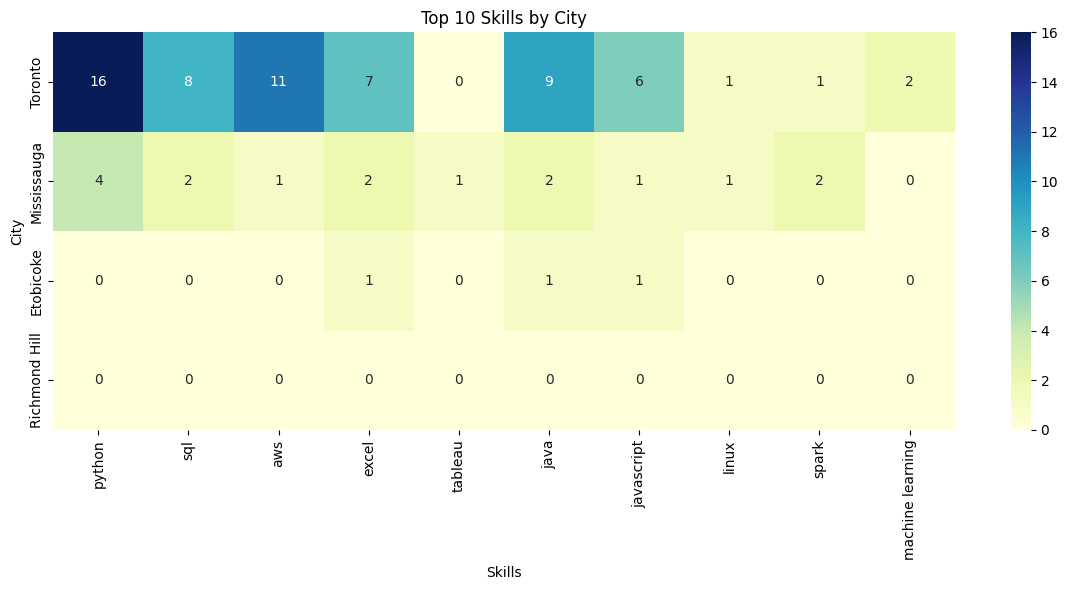

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

title = "Python Developer"
location = "Toronto"
pages = 3
skill_keywords = ['python', 'sql', 'aws', 'excel', 'tableau', 'java', 'javascript', 'linux', 'spark', 'machine learning']

id_list = []
for start in range(0, pages * 25, 25):
    url = f"https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={title}&location={location}&start={start}"
    soup = BeautifulSoup(requests.get(url).text, "html.parser")
    jobs = soup.find_all("li")
    for job in jobs:
        div = job.find("div", {"class": "base-card"})
        if div:
            job_id = div.get("data-entity-urn").split(":")[3]
            id_list.append(job_id)

job_list = []
for job_id in id_list:
    url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    soup = BeautifulSoup(requests.get(url).text, "html.parser")

    post = {
        "job_id": job_id,
        "title": soup.find("h2").text.strip() if soup.find("h2") else None,
        "company": soup.find("a", class_="topcard__org-name-link").text.strip() if soup.find("a", class_="topcard__org-name-link") else None,
        "location": soup.find("span", class_="topcard__flavor topcard__flavor--bullet").text.strip() if soup.find("span", class_="topcard__flavor topcard__flavor--bullet") else location
    }

    try:
        desc = soup.find("div", class_="show-more-less-html__markup").text.lower()
    except:
        desc = ""

    post["description"] = desc
    for skill in skill_keywords:
        post[skill] = 1 if skill in desc else 0

    job_list.append(post)

df = pd.DataFrame(job_list)
df["city"] = df["location"].str.extract(r"([A-Za-z\s]+),")

skill_cols = skill_keywords
heatmap_data = df.groupby("city")[skill_cols].sum()
top_cities = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data_top = heatmap_data.loc[top_cities]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_top, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Top 10 Skills by City")
plt.xlabel("Skills")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [11]:
jobs_df = pd.DataFrame(job_list)
jobs_df

,job_id,title,company,location,description,python,sql,aws,excel,tableau,java,javascript,linux,spark,machine learning
0,4214886348,Python Engineer,Citi,"Mississauga, Ontario, Canada",\n join our team and work on a cuttin...,1,1,0,0,0,0,0,0,1,0
1,4213909205,Python Engineer,TD,"Toronto, Ontario, Canada","\nlieu de travailtoronto, ontario, canadahorai...",1,0,0,1,0,0,0,0,0,0
2,4189756714,Software Developer(Full-stack) - Python,Autodesk,"Toronto, Ontario, Canada","\njob requisition id #25wd8489325wd84893, soft...",1,1,1,1,0,1,1,0,0,0
3,4204882138,Python Developer,Collabera,"Toronto, Ontario, Canada",\n this is a pure hands-on python development ...,1,0,1,0,0,0,0,0,0,0
4,4190362518,"Python Developer (Spark, Big Data)",Citi,"Toronto, Ontario, Canada",\n the python developer is a senior l...,1,0,1,1,0,0,0,0,1,0
5,4151322382,Software Engineer (Intern),Naptha AI,"Toronto, Ontario, Canada",\n software engineer (intern) | napth...,1,0,0,0,0,0,0,0,0,0
6,4211157671,Python Full Stack Developer,Citi,"Mississauga, Ontario, Canada",\n we are seeking a talented and self...,1,0,0,0,1,1,1,0,0,0
7,4033906214,Python Engineer-Developer,J&M Group,"Toronto, Ontario, Canada",\n role description: 1. responsible f...,1,0,0,0,0,0,0,0,0,0
8,4204282039,Backend Software Engineer,Lyft,"Toronto, Ontario, Canada","\n at lyft, our purpose is to serve a...",0,1,0,0,0,0,0,0,0,0
9,4200184203,Fullstack Engineer,Lyft,"Toronto, Ontario, Canada","\n at lyft, our purpose is to serve a...",1,0,1,0,0,1,1,0,0,1
